## **In Class Test 1 | NLP Analysis of Customer Support Chat Data | Date : 2024.11.11**

---

### student details

*   **Name :** S.C.S.Sandanayake
*   **index No (Plymouth) :** 10899486
*   **index No (NSBM) :** 25002

---

**1. Scenario**

You are working as a data scientist for "QuickHelp," a customer support company that handles
thousands of support queries across various products. Your task is to analyze a sample of
customer support chat data to better understand common customer concerns, streamline
support services, and provide insights for improving chatbot responses.

**2. Task Overview**

Using a provided chat log dataset, preprocess and analyze the text data to extract key insights.
Apply NLP techniques like tokenization, stemming, lemmatization, POS tagging, and Named
Entity Recognition (NER) to identify patterns and trends in customer queries.





---



In [466]:
#import libraries
import spacy

In [467]:
#download the language model
#!python -m spacy download en_core_web_lg

In [468]:
#load spacy english (small) language model
nlp = spacy.load('en_core_web_lg')

In [469]:
#check the model pipeline objects / components that are available
nlp.component_names

['tok2vec',
 'tagger',
 'parser',
 'senter',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [470]:
#more details about components
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7fc159c0d900>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fc159c4b280>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fc1596c8510>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fc18981e340>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fc12644afc0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fc1596ca9d0>)]

In [471]:
#load the customer chat dataset
import pandas as pd

df1 = pd.read_csv('/customer_support_chats_data.csv')
#Display basic info
df1.head()

,customer_id,chat_date,message_text
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl..."
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...


**Data visualizations**

data set contains 2 numerical and 1 catgorical data columns. but there are no variations between or within numerical data columns & categorical column contains different text / sentences so we coudn't get meaningfull insghts or patterns about the dataset using any visualisations.

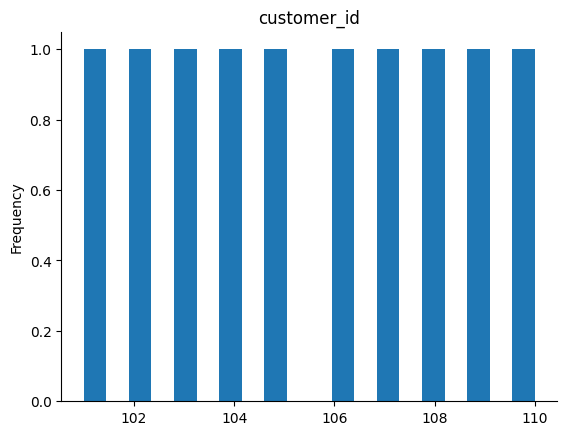

In [472]:
# histogram using customer_id

from matplotlib import pyplot as plt

df1['customer_id'].plot(kind='hist', bins=20, title='customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Text Preprocessing**

In [473]:
import re

#preprocessing the text
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        return text.strip()
    return ''

#apply preprocessing
df1['cleaned_text'] = df1['message_text'].apply(preprocess_text)

In [474]:
df1['cleaned_text']

,cleaned_text
0,"i'm having trouble logging into my account, pl..."
1,how do i change my password? i forgot the old ...
2,can i return a product that i bought last week...
3,when will my order be shipped? i haven't recei...
4,i need to update my shipping address for my re...
5,is it possible to get a refund on a defective ...
6,my credit card was charged incorrectly. can yo...
7,i was charged twice for the same order. please...
8,do you have any new deals or discounts for the...
9,can you explain the warranty policy on your el...


### **Sentence Tokenization**

In [475]:
# Sentence tokenization
df1['tokenized_sentences'] = df1['cleaned_text'].apply(lambda text: [sent.text for sent in nlp(text).sents])

In [476]:
df1['tokenized_sentences']

,tokenized_sentences
0,"[i'm having trouble logging into my account, p..."
1,"[how do i change my password?, i forgot the ol..."
2,[can i return a product that i bought last wee...
3,"[when will my order be shipped?, i haven't rec..."
4,[i need to update my shipping address for my r...
5,[is it possible to get a refund on a defective...
6,"[my credit card was charged incorrectly., can ..."
7,"[i was charged twice for the same order., plea..."
8,[do you have any new deals or discounts for th...
9,[can you explain the warranty policy on your e...


### **Word Tokenization**

In [477]:
# Word tokenization (on sentence-level tokens)
df1['tokenized_words'] = df1['tokenized_sentences'].apply(lambda sentences: [token.text for sent in sentences for token in nlp(sent)])

In [478]:
#do Tokenization for cleaned text
#df1['tokens'] = df1['cleaned_text'].apply(lambda text: [token.text for token in nlp(text)])

In [479]:
df1['tokenized_words']

,tokenized_words
0,"[i, 'm, having, trouble, logging, into, my, ac..."
1,"[how, do, i, change, my, password, ?, i, forgo..."
2,"[can, i, return, a, product, that, i, bought, ..."
3,"[when, will, my, order, be, shipped, ?, i, hav..."
4,"[i, need, to, update, my, shipping, address, f..."
5,"[is, it, possible, to, get, a, refund, on, a, ..."
6,"[my, credit, card, was, charged, incorrectly, ..."
7,"[i, was, charged, twice, for, the, same, order..."
8,"[do, you, have, any, new, deals, or, discounts..."
9,"[can, you, explain, the, warranty, policy, on,..."


In [480]:
#look at the dataset
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac..."
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo..."
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ..."
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav..."
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f..."
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ..."
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ..."
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order..."
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts..."
9,110,2024-11-10 11:15:00,Can you explain the warranty policy on your el...,can you explain the warranty policy on your el...,[can you explain the warranty policy on your e...,"[can, you, explain, the, warranty, policy, on,..."


### **Tokenization Final Outputs**

In [481]:
print("\nMessage_text,Cleaned Texts, Sentence Tokens, and Tokenized Words:")
print("=" * 60)
for idx, row in df1.iterrows():
    print("")
    print(f"Message_text {idx + 1}:")
    print(f"Original Text: {row['message_text']}")
    print(f"Cleaned Text: {row['cleaned_text']}")
    print(f"Sentence Token: {row['tokenized_sentences']}")
    print(f"Word Tokens: {row['tokenized_words']}")
    print("")
    print("-" * 50)


Message_text,Cleaned Texts, Sentence Tokens, and Tokenized Words:

Message_text 1:
Original Text: I'm having trouble logging into my account, please help me.
Cleaned Text: i'm having trouble logging into my account, please help me.
Sentence Token: ["i'm having trouble logging into my account, please help me."]
Word Tokens: ['i', "'m", 'having', 'trouble', 'logging', 'into', 'my', 'account', ',', 'please', 'help', 'me', '.']

--------------------------------------------------

Message_text 2:
Original Text: How do I change my password? I forgot the old one.
Cleaned Text: how do i change my password? i forgot the old one.
Sentence Token: ['how do i change my password?', 'i forgot the old one.']
Word Tokens: ['how', 'do', 'i', 'change', 'my', 'password', '?', 'i', 'forgot', 'the', 'old', 'one', '.']

--------------------------------------------------

Message_text 3:
Original Text: Can I return a product that I bought last week? It's defective.
Cleaned Text: can i return a product that i

### **Stemming and Lemmatization**

#### *1. Lemmatization*

In [482]:
df1['lemmatized'] = df1['tokenized_words'].apply(lambda tokens: [nlp(token)[0].lemma_ for token in tokens])

In [483]:
df1['lemmatized']

,lemmatized
0,"[I, ', have, trouble, log, into, my, account, ..."
1,"[how, do, I, change, my, password, ?, I, forge..."
2,"[can, I, return, a, product, that, I, buy, las..."
3,"[when, will, my, order, be, ship, ?, I, have, ..."
4,"[I, need, to, update, my, ship, address, for, ..."
5,"[be, it, possible, to, get, a, refund, on, a, ..."
6,"[my, credit, card, be, charge, incorrectly, .,..."
7,"[I, be, charge, twice, for, the, same, order, ..."
8,"[do, you, have, any, new, deal, or, discount, ..."
9,"[can, you, explain, the, warranty, policy, on,..."


In [484]:
print("\nMessage_text, Cleaned Texts, Tokenized Words, Lemmatized Words:")
print("=" * 60)
for idx, row in df1.iterrows():
    print("")
    print(f"Message_text {idx + 1}:")
    print(f"Original Text: {row['message_text']}")
    print(f"Word Tokens: {row['tokenized_words']}")
    print(f"Lemmatized Words: {row['lemmatized']}")
    print("")
    print("-" * 50)


Message_text, Cleaned Texts, Tokenized Words, Lemmatized Words:

Message_text 1:
Original Text: I'm having trouble logging into my account, please help me.
Word Tokens: ['i', "'m", 'having', 'trouble', 'logging', 'into', 'my', 'account', ',', 'please', 'help', 'me', '.']
Lemmatized Words: ['I', "'", 'have', 'trouble', 'log', 'into', 'my', 'account', ',', 'please', 'help', 'I', '.']

--------------------------------------------------

Message_text 2:
Original Text: How do I change my password? I forgot the old one.
Word Tokens: ['how', 'do', 'i', 'change', 'my', 'password', '?', 'i', 'forgot', 'the', 'old', 'one', '.']
Lemmatized Words: ['how', 'do', 'I', 'change', 'my', 'password', '?', 'I', 'forget', 'the', 'old', 'one', '.']

--------------------------------------------------

Message_text 3:
Original Text: Can I return a product that I bought last week? It's defective.
Word Tokens: ['can', 'i', 'return', 'a', 'product', 'that', 'i', 'bought', 'last', 'week', '?', 'it', "'s", 'defec

**comparison between word tokens and lemmatized columns**

In [485]:
#view tokens and lemmatized columns
df1[['tokenized_words', 'lemmatized']]

,tokenized_words,lemmatized
0,"[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ..."
1,"[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge..."
2,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las..."
3,"[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ..."
4,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ..."
5,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ..."
6,"[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,..."
7,"[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ..."
8,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ..."
9,"[can, you, explain, the, warranty, policy, on,...","[can, you, explain, the, warranty, policy, on,..."


#### *2. Stemming*

In [486]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Perform stemming
df1['stemmed'] = df1['tokenized_words'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])


In [487]:
df1['stemmed']

,stemmed
0,"[i, 'm, have, troubl, log, into, my, account, ..."
1,"[how, do, i, chang, my, password, ?, i, forgot..."
2,"[can, i, return, a, product, that, i, bought, ..."
3,"[when, will, my, order, be, ship, ?, i, have, ..."
4,"[i, need, to, updat, my, ship, address, for, m..."
5,"[is, it, possibl, to, get, a, refund, on, a, d..."
6,"[my, credit, card, wa, charg, incorrectli, ., ..."
7,"[i, wa, charg, twice, for, the, same, order, ...."
8,"[do, you, have, ani, new, deal, or, discount, ..."
9,"[can, you, explain, the, warranti, polici, on,..."


**comparison between word tokens and stemmed columns**

In [488]:
#view tokens and lemmatized columns
df1[['tokenized_words', 'stemmed']]

,tokenized_words,stemmed
0,"[i, 'm, having, trouble, logging, into, my, ac...","[i, 'm, have, troubl, log, into, my, account, ..."
1,"[how, do, i, change, my, password, ?, i, forgo...","[how, do, i, chang, my, password, ?, i, forgot..."
2,"[can, i, return, a, product, that, i, bought, ...","[can, i, return, a, product, that, i, bought, ..."
3,"[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, i, have, ..."
4,"[i, need, to, update, my, shipping, address, f...","[i, need, to, updat, my, ship, address, for, m..."
5,"[is, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d..."
6,"[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, wa, charg, incorrectli, ., ..."
7,"[i, was, charged, twice, for, the, same, order...","[i, wa, charg, twice, for, the, same, order, ...."
8,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, ani, new, deal, or, discount, ..."
9,"[can, you, explain, the, warranty, policy, on,...","[can, you, explain, the, warranti, polici, on,..."


In [489]:
print("\nMessage_text, Cleaned Texts, Tokenized Words, Stemmed Words:")
print("=" * 60)
for idx, row in df1.iterrows():
    print("")
    print(f"Message_text {idx + 1}:")
    print(f"Original Text: {row['message_text']}")
    print(f"Word Tokens: {row['tokenized_words']}")
    print(f"stemmed Words: {row['stemmed']}")
    print("")
    print("-" * 50)


Message_text, Cleaned Texts, Tokenized Words, Stemmed Words:

Message_text 1:
Original Text: I'm having trouble logging into my account, please help me.
Word Tokens: ['i', "'m", 'having', 'trouble', 'logging', 'into', 'my', 'account', ',', 'please', 'help', 'me', '.']
stemmed Words: ['i', "'m", 'have', 'troubl', 'log', 'into', 'my', 'account', ',', 'pleas', 'help', 'me', '.']

--------------------------------------------------

Message_text 2:
Original Text: How do I change my password? I forgot the old one.
Word Tokens: ['how', 'do', 'i', 'change', 'my', 'password', '?', 'i', 'forgot', 'the', 'old', 'one', '.']
stemmed Words: ['how', 'do', 'i', 'chang', 'my', 'password', '?', 'i', 'forgot', 'the', 'old', 'one', '.']

--------------------------------------------------

Message_text 3:
Original Text: Can I return a product that I bought last week? It's defective.
Word Tokens: ['can', 'i', 'return', 'a', 'product', 'that', 'i', 'bought', 'last', 'week', '?', 'it', "'s", 'defective', '.'

### **comparison between lemmatized and stemmed columns**

In [490]:
#view lemmatized and stemmed columns
df1[['lemmatized', 'stemmed']]

,lemmatized,stemmed
0,"[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ..."
1,"[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot..."
2,"[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ..."
3,"[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ..."
4,"[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m..."
5,"[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d..."
6,"[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ..."
7,"[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ...."
8,"[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, discount, ..."
9,"[can, you, explain, the, warranty, policy, on,...","[can, you, explain, the, warranti, polici, on,..."


In [491]:
print("\nMessage_text, Cleaned Texts, Tokenized Words, Stemmed Words:")
print("=" * 60)
for idx, row in df1.iterrows():
    print("")
    print(f"Message_text {idx + 1}:")
    print(f"Original Text: {row['message_text']}")
    print(f"Lemmatized Words: {row['lemmatized']}")
    print(f"Stemmed Words: {row['stemmed']}")
    print("")
    print("-" * 50)


Message_text, Cleaned Texts, Tokenized Words, Stemmed Words:

Message_text 1:
Original Text: I'm having trouble logging into my account, please help me.
Lemmatized Words: ['I', "'", 'have', 'trouble', 'log', 'into', 'my', 'account', ',', 'please', 'help', 'I', '.']
Stemmed Words: ['i', "'m", 'have', 'troubl', 'log', 'into', 'my', 'account', ',', 'pleas', 'help', 'me', '.']

--------------------------------------------------

Message_text 2:
Original Text: How do I change my password? I forgot the old one.
Lemmatized Words: ['how', 'do', 'I', 'change', 'my', 'password', '?', 'I', 'forget', 'the', 'old', 'one', '.']
Stemmed Words: ['how', 'do', 'i', 'chang', 'my', 'password', '?', 'i', 'forgot', 'the', 'old', 'one', '.']

--------------------------------------------------

Message_text 3:
Original Text: Can I return a product that I bought last week? It's defective.
Lemmatized Words: ['can', 'I', 'return', 'a', 'product', 'that', 'I', 'buy', 'last', 'week', '?', 'it', 'be', 'defective',

### **POS Tagging**

In [492]:
# Perform POS tagging
df1['pos_tags'] = df1['tokenized_words'].apply(lambda tokens: [(token.text, token.pos_) for token in nlp(" ".join(tokens))])

In [493]:
df1['pos_tags']

,pos_tags
0,"[(i, PRON), (', AUX), (m, AUX), (having, VERB)..."
1,"[(how, SCONJ), (do, AUX), (i, PRON), (change, ..."
2,"[(can, AUX), (i, PRON), (return, VERB), (a, DE..."
3,"[(when, SCONJ), (will, AUX), (my, PRON), (orde..."
4,"[(i, PRON), (need, VERB), (to, PART), (update,..."
5,"[(is, AUX), (it, PRON), (possible, ADJ), (to, ..."
6,"[(my, PRON), (credit, NOUN), (card, NOUN), (wa..."
7,"[(i, PRON), (was, AUX), (charged, VERB), (twic..."
8,"[(do, AUX), (you, PRON), (have, VERB), (any, D..."
9,"[(can, AUX), (you, PRON), (explain, VERB), (th..."


In [494]:
print("\nMessage_text, Cleaned Texts, Tokenized Words, Stemmed Words:")
print("=" * 60)
for idx, row in df1.iterrows():
    print("")
    print(f"Message_text {idx + 1}:")
    print(f"Original Text: {row['message_text']}")
    print(f"tokenized Words: {row['tokenized_words']}")
    print(f"POS Tags: {row['pos_tags']}")
    print("")
    print("-" * 50)


Message_text, Cleaned Texts, Tokenized Words, Stemmed Words:

Message_text 1:
Original Text: I'm having trouble logging into my account, please help me.
tokenized Words: ['i', "'m", 'having', 'trouble', 'logging', 'into', 'my', 'account', ',', 'please', 'help', 'me', '.']
POS Tags: [('i', 'PRON'), ("'", 'AUX'), ('m', 'AUX'), ('having', 'VERB'), ('trouble', 'NOUN'), ('logging', 'VERB'), ('into', 'ADP'), ('my', 'PRON'), ('account', 'NOUN'), (',', 'PUNCT'), ('please', 'INTJ'), ('help', 'VERB'), ('me', 'PRON'), ('.', 'PUNCT')]

--------------------------------------------------

Message_text 2:
Original Text: How do I change my password? I forgot the old one.
tokenized Words: ['how', 'do', 'i', 'change', 'my', 'password', '?', 'i', 'forgot', 'the', 'old', 'one', '.']
POS Tags: [('how', 'SCONJ'), ('do', 'AUX'), ('i', 'PRON'), ('change', 'VERB'), ('my', 'PRON'), ('password', 'NOUN'), ('?', 'PUNCT'), ('i', 'PRON'), ('forgot', 'VERB'), ('the', 'DET'), ('old', 'ADJ'), ('one', 'NUM'), ('.', 'PU

### **Named Entity Recognition (NER)**

In [495]:
# Extract named entities
df1['entities'] = df1['tokenized_words'].apply(lambda tokens: [(ent.text, ent.label_) for ent in nlp(" ".join(tokens)).ents])

In [496]:
df1['entities']

,entities
0,[]
1,[]
2,"[(last week, DATE)]"
3,[]
4,[]
5,"[(a month ago, DATE)]"
6,[]
7,[]
8,"[(the upcoming holiday season, DATE)]"
9,[]


In [497]:
print("\nMessage_text, Cleaned Texts, Tokenized Words, Stemmed Words:")
print("=" * 60)
for idx, row in df1.iterrows():
    print("")
    print(f"Message_text {idx + 1}:")
    print(f"Original Text: {row['message_text']}")
    print(f"tokenized Words: {row['tokenized_words']}")
    print(f"NER: {row['entities']}")
    print("")
    print("-" * 50)


Message_text, Cleaned Texts, Tokenized Words, Stemmed Words:

Message_text 1:
Original Text: I'm having trouble logging into my account, please help me.
tokenized Words: ['i', "'m", 'having', 'trouble', 'logging', 'into', 'my', 'account', ',', 'please', 'help', 'me', '.']
NER: []

--------------------------------------------------

Message_text 2:
Original Text: How do I change my password? I forgot the old one.
tokenized Words: ['how', 'do', 'i', 'change', 'my', 'password', '?', 'i', 'forgot', 'the', 'old', 'one', '.']
NER: []

--------------------------------------------------

Message_text 3:
Original Text: Can I return a product that I bought last week? It's defective.
tokenized Words: ['can', 'i', 'return', 'a', 'product', 'that', 'i', 'bought', 'last', 'week', '?', 'it', "'s", 'defective', '.']
NER: [('last week', 'DATE')]

--------------------------------------------------

Message_text 4:
Original Text: When will my order be shipped? I haven't received any updates.
tokenized W

In [498]:
from spacy import displacy

# Function to visualize named entities in the messages
def visualize_ner(df):
    for message in df1['message_text']:
        doc = nlp(message)
        displacy.render(doc, style='ent', jupyter=True)

# Visualize the named entities in the dataframe
visualize_ner(df1)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [499]:
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words,lemmatized,stemmed,pos_tags,entities
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ...","[(i, PRON), (', AUX), (m, AUX), (having, VERB)...",[]
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot...","[(how, SCONJ), (do, AUX), (i, PRON), (change, ...",[]
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ...","[(can, AUX), (i, PRON), (return, VERB), (a, DE...","[(last week, DATE)]"
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ...","[(when, SCONJ), (will, AUX), (my, PRON), (orde...",[]
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m...","[(i, PRON), (need, VERB), (to, PART), (update,...",[]
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d...","[(is, AUX), (it, PRON), (possible, ADJ), (to, ...","[(a month ago, DATE)]"
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ...","[(my, PRON), (credit, NOUN), (card, NOUN), (wa...",[]
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ....","[(i, PRON), (was, AUX), (charged, VERB), (twic...",[]
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, discount, ...","[(do, AUX), (you, PRON), (have, VERB), (any, D...","[(the upcoming holiday season, DATE)]"
9,110,2024-11-10 11:15:00,Can you explain the warranty policy on your el...,can you explain the warranty policy on your el...,[can you explain the warranty policy on your e...,"[can, you, explain, the, warranty, policy, on,...","[can, you, explain, the, warranty, policy, on,...","[can, you, explain, the



---


## **Exploratory Data Analysis (EDA)**

In [500]:
from collections import Counter

# Analyze token frequency
token_counter = Counter([token for tokens in df1['tokenized_words'] for token in tokens])
print(token_counter.most_common(15))

# Analyze entity frequency
entity_counter = Counter([entity for entities in df1['entities'] for entity, label in entities])
print(entity_counter.most_common())

[('i', 9), ('.', 8), ('?', 7), ('my', 6), ('the', 4), ('a', 4), ('can', 3), ('it', 3), ('order', 3), ('for', 3), ('you', 3), ('please', 2), ('do', 2), ('that', 2), ('bought', 2)]
[('last week', 1), ('a month ago', 1), ('the upcoming holiday season', 1)]


In [501]:
from collections import Counter
from nltk import bigrams

# NER for identifying topics (e.g., billing, shipping, products)
entities = [ent for sublist in df1['entities'] for ent, label in sublist]
entity_counts = Counter(entities)

# Calculate and store bigram frequencies bag of words
bigram_list = list(bigrams(df1['tokenized_words'].sum()))
bigram_counter = Counter(bigram_list)

# Common word frequency
common_words = token_counter.most_common()
print("")
print("Top 10 Frequent Words (Concerns):")
print("-" * 50)
for word, count in common_words:
    print(f"{word}: {count}")

# Common phrases frequency
common_phrases = bigram_counter.most_common()
print("")
print("\nTop 10 Frequent Phrases (Concerns):")
print("-" * 50)
for phrase, count in common_phrases:
    print(f"{' '.join(phrase)}: {count}")

# common named entities
print("")
print("\nFrequent Named Entities (Categories):")
print("-" * 50)
for entity, count in entity_counts.most_common():
    print(f"{entity}: {count}")


Top 10 Frequent Words (Concerns):
--------------------------------------------------
i: 9
.: 8
?: 7
my: 6
the: 4
a: 4
can: 3
it: 3
order: 3
for: 3
you: 3
please: 2
do: 2
that: 2
bought: 2
defective: 2
have: 2
any: 2
to: 2
on: 2
was: 2
charged: 2
'm: 1
having: 1
trouble: 1
logging: 1
into: 1
account: 1
,: 1
help: 1
me: 1
how: 1
change: 1
password: 1
forgot: 1
old: 1
one: 1
return: 1
product: 1
last: 1
week: 1
's: 1
when: 1
will: 1
be: 1
shipped: 1
n't: 1
received: 1
updates: 1
need: 1
update: 1
shipping: 1
address: 1
recent: 1
is: 1
possible: 1
get: 1
refund: 1
item: 1
month: 1
ago: 1
credit: 1
card: 1
incorrectly: 1
assist: 1
with: 1
twice: 1
same: 1
check: 1
new: 1
deals: 1
or: 1
discounts: 1
upcoming: 1
holiday: 1
season: 1
explain: 1
warranty: 1
policy: 1
your: 1
electronics: 1
products: 1


Top 10 Frequent Phrases (Concerns):
--------------------------------------------------
? i: 3
. can: 2
i bought: 2
order .: 2
was charged: 2
can you: 2
for the: 2
i 'm: 1
'm having: 1
having tr

### **Visualizations of tokens, bigrams and entity frequency**

**1. Number of tokens count**

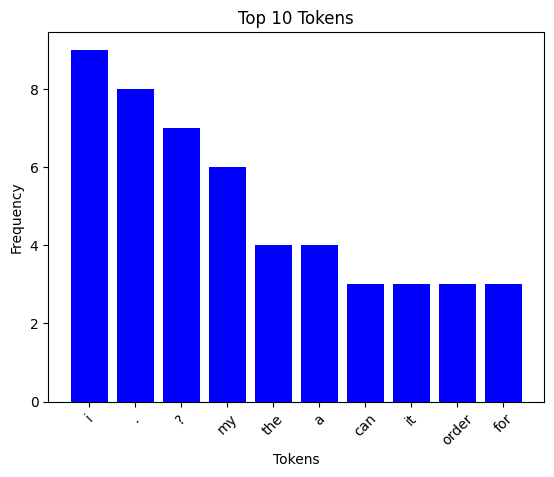

In [502]:
import matplotlib.pyplot as plt

#Plot top 10 tokens
top_tokens = token_counter.most_common(10)
tokens, counts = zip(*top_tokens)

plt.bar(tokens, counts, color='blue')
plt.title("Top 10 Tokens")
plt.ylabel("Frequency")
plt.xlabel("Tokens")
plt.xticks(rotation=45)
plt.show()

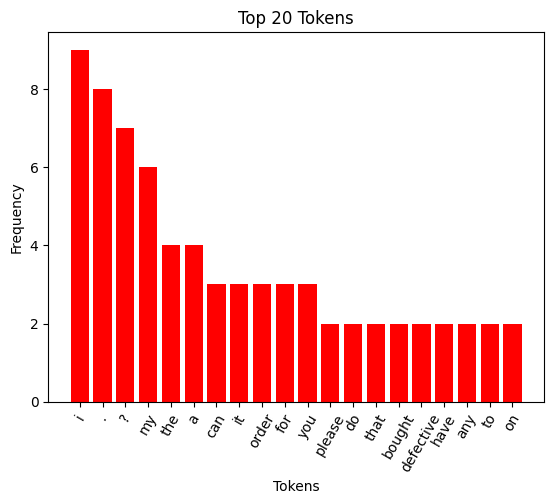

In [503]:
#Plot top 20 tokens
top_tokens = token_counter.most_common(20)
tokens, counts = zip(*top_tokens)

plt.bar(tokens, counts, color='red')
plt.title("Top 20 Tokens")
plt.ylabel("Frequency")
plt.xlabel("Tokens")
plt.xticks(rotation=60)
plt.show()

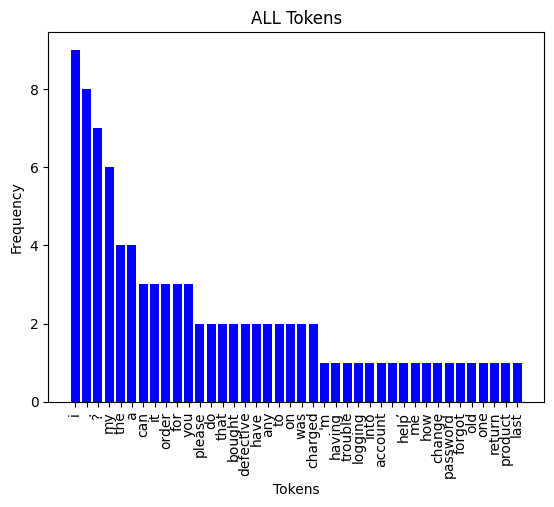

In [504]:
#Plot top 10 tokens
top_tokens = token_counter.most_common(40)
tokens, counts = zip(*top_tokens)

plt.bar(tokens, counts, color='blue')
plt.title("ALL Tokens")
plt.ylabel("Frequency")
plt.xlabel("Tokens")
plt.xticks(rotation=90)
plt.show()

**2. Number of Bigrams count**

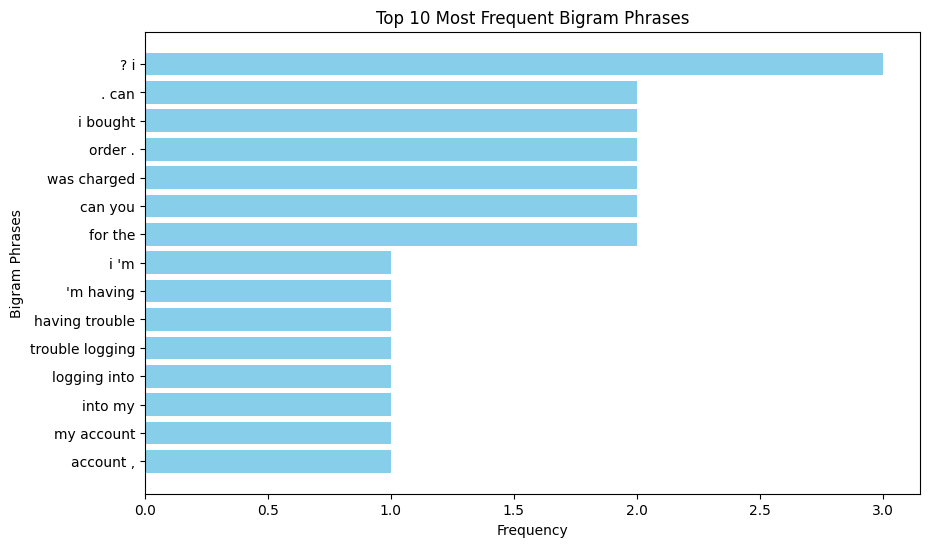

In [505]:
import pandas as pd

# Get the most common bigrams
common_phrases = bigram_counter.most_common(15)  # Top 10 bigrams

# Prepare data for plotting
phrases = [' '.join(bigram) for bigram, count in common_phrases]
counts = [count for bigram, count in common_phrases]

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(phrases, counts, color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Bigram Phrases")
plt.title("Top 10 Most Frequent Bigram Phrases")
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent on top
plt.show()

**3. Number of entities count**

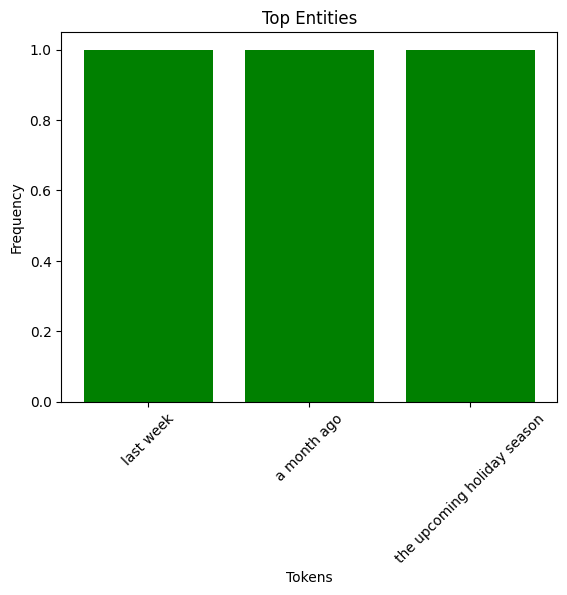

In [506]:
#Plot top entities
top_tokens = entity_counter.most_common()
tokens, counts = zip(*top_tokens)

plt.bar(tokens, counts, color='green')
plt.title("Top Entities")
plt.ylabel("Frequency")
plt.xlabel("Tokens")
plt.xticks(rotation=45)
plt.show()

<ipython-input-507-ab6a299b2640>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=entities, palette='viridis')


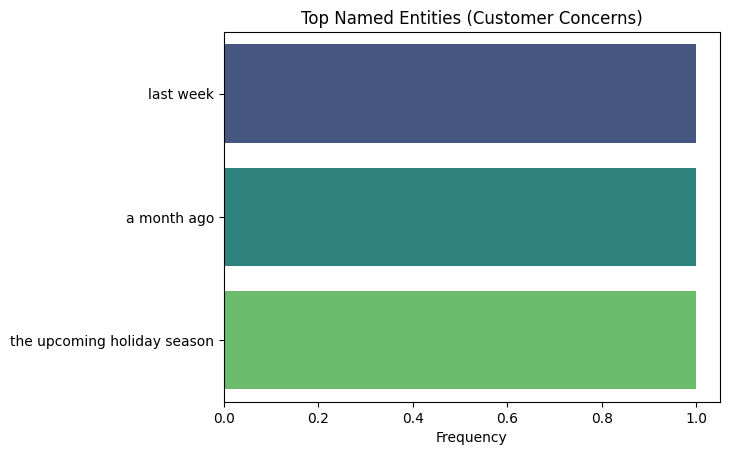

In [507]:
import seaborn as sns

# Plot top entities
top_entities = entity_counts.most_common(10)
entities, counts = zip(*top_entities)

sns.barplot(x=counts, y=entities, palette='viridis')
plt.title('Top Named Entities (Customer Concerns)')
plt.xlabel('Frequency')
plt.show()

**4. Create word cloud plot**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


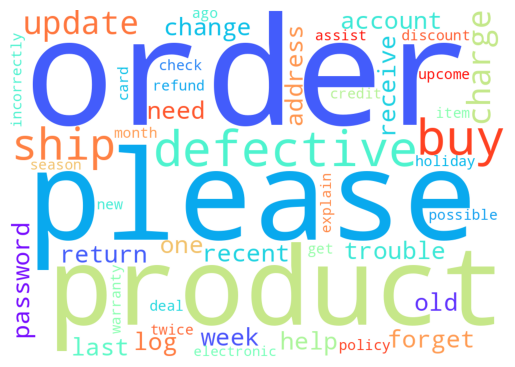

In [508]:
import nltk

# Download stopwords
nltk.download('stopwords')

# Then proceed with the WordCloud code
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Flatten the lemmatized words list into a single list of strings
flattened_lemmatized = [word for sublist in df1['lemmatized'] for word in sublist]

# Join the flattened list into a single string
text = ' '.join(flattened_lemmatized)

# Generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width=1000,
    height=700,
    max_words=200,
    background_color='white',
    colormap='rainbow_r',
    stopwords=stop_words
).generate(text)

# Display the word cloud
plt.axis('off')
plt.imshow(wc)
plt.show()

In [509]:
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words,lemmatized,stemmed,pos_tags,entities
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ...","[(i, PRON), (', AUX), (m, AUX), (having, VERB)...",[]
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot...","[(how, SCONJ), (do, AUX), (i, PRON), (change, ...",[]
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ...","[(can, AUX), (i, PRON), (return, VERB), (a, DE...","[(last week, DATE)]"
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ...","[(when, SCONJ), (will, AUX), (my, PRON), (orde...",[]
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m...","[(i, PRON), (need, VERB), (to, PART), (update,...",[]
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d...","[(is, AUX), (it, PRON), (possible, ADJ), (to, ...","[(a month ago, DATE)]"
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ...","[(my, PRON), (credit, NOUN), (card, NOUN), (wa...",[]
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ....","[(i, PRON), (was, AUX), (charged, VERB), (twic...",[]
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, discount, ...","[(do, AUX), (you, PRON), (have, VERB), (any, D...","[(the upcoming holiday season, DATE)]"
9,110,2024-11-10 11:15:00,Can you explain the warranty policy on your el...,can you explain the warranty policy on your el...,[can you explain the warranty policy on your e...,"[can, you, explain, the, warranty, policy, on,...","[can, you, explain, the, warranty, policy, on,...","[can, you, explain, the

In [510]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
vectorizer = TfidfVectorizer(max_features=50, stop_words='english', max_df=(0.95))
tfidf_matrix = vectorizer.fit_transform(df1['cleaned_text'])

# Display top words contributing to topics
print("Top Words Per Topic:")
print(vectorizer.get_feature_names_out())

Top Words Per Topic:
['account' 'address' 'ago' 'assist' 'bought' 'card' 'change' 'charged'
 'check' 'credit' 'deals' 'defective' 'discounts' 'electronics' 'explain'
 'forgot' 'haven' 'having' 'help' 'holiday' 'incorrectly' 'item' 'logging'
 'month' 'need' 'new' 'old' 'order' 'password' 'policy' 'possible'
 'product' 'products' 'received' 'recent' 'refund' 'return' 'season'
 'shipped' 'shipping' 'trouble' 'twice' 'upcoming' 'update' 'updates'
 'warranty' 'week']


In [511]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Add cluster labels to the data
df1['topic'] = kmeans.labels_

# Display sample queries for each topic
for i in range(num_clusters):
    print(f"Topic {i}:")
    print(df1[df1['topic'] == i]['cleaned_text'].head())
    print("=" * 50)
    print("")

Topic 0:
2    can i return a product that i bought last week...
3    when will my order be shipped? i haven't recei...
5    is it possible to get a refund on a defective ...
8    do you have any new deals or discounts for the...
Name: cleaned_text, dtype: object

Topic 1:
4    i need to update my shipping address for my re...
6    my credit card was charged incorrectly. can yo...
7    i was charged twice for the same order. please...
Name: cleaned_text, dtype: object

Topic 2:
1    how do i change my password? i forgot the old ...
Name: cleaned_text, dtype: object

Topic 3:
9    can you explain the warranty policy on your el...
Name: cleaned_text, dtype: object

Topic 4:
0    i'm having trouble logging into my account, pl...
Name: cleaned_text, dtype: object



In [512]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Get feature names and top words
feature_names = vectorizer.get_feature_names_out()
top_n_words = 5  # Number of top words to consider per cluster

# Analyze each cluster to determine its top words
for cluster_idx in range(num_clusters):
    top_indices = np.argsort(kmeans.cluster_centers_[cluster_idx])[-top_n_words:]
    top_words = [feature_names[i] for i in reversed(top_indices)]
    print(f"Cluster {cluster_idx} Top Words: {' | '.join(top_words)}")

# Step 2: Define a mapping for cluster labels to categories
# Based on the top words printed above, you decide on the categories
cluster_category_mapping = {
    0: 'Orders and Product queries',
    1: 'Payment queries',
    2: 'User Log In Sign Up queries',
    3: 'Warrenty queries',
    4: 'User Account queries',
}

# Step 3: Replace numeric cluster labels with category names
df1['topic'] = df1['topic'].map(cluster_category_mapping)

# Display the updated DataFrame
print('')
print(df1[['cleaned_text', 'topic']].head())


Cluster 0 Top Words: defective | bought | week | product | return
Cluster 1 Top Words: charged | order | check | twice | card
Cluster 2 Top Words: old | password | change | forgot | week
Cluster 3 Top Words: warranty | policy | explain | electronics | products
Cluster 4 Top Words: account | help | having | trouble | logging

                                        cleaned_text  \
0  i'm having trouble logging into my account, pl...   
1  how do i change my password? i forgot the old ...   
2  can i return a product that i bought last week...   
3  when will my order be shipped? i haven't recei...   
4  i need to update my shipping address for my re...   

                         topic  
0         User Account queries  
1  User Log In Sign Up queries  
2   Orders and Product queries  
3   Orders and Product queries  
4              Payment queries  


### **topic distribution plot**

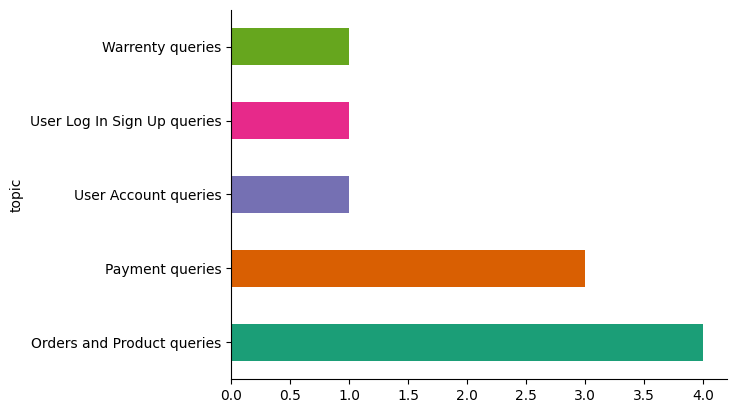

In [532]:
from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [513]:
print("\nCleaned Texts, Topics:")
print("=" * 60)
for idx, row in df1.iterrows():
    print("")
    print(f"Message_text {idx + 1}:")
    print(f"Original Text : {row['cleaned_text']}")
    print(f"Qeuary / Topic Category : {row['topic']}")
    print("")
    print("-" * 50)


Cleaned Texts, Topics:

Message_text 1:
Original Text : i'm having trouble logging into my account, please help me.
Qeuary / Topic Category : User Account queries

--------------------------------------------------

Message_text 2:
Original Text : how do i change my password? i forgot the old one.
Qeuary / Topic Category : User Log In Sign Up queries

--------------------------------------------------

Message_text 3:
Original Text : can i return a product that i bought last week? it's defective.
Qeuary / Topic Category : Orders and Product queries

--------------------------------------------------

Message_text 4:
Original Text : when will my order be shipped? i haven't received any updates.
Qeuary / Topic Category : Orders and Product queries

--------------------------------------------------

Message_text 5:
Original Text : i need to update my shipping address for my recent order.
Qeuary / Topic Category : Payment queries

--------------------------------------------------

Messa

In [514]:
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words,lemmatized,stemmed,pos_tags,entities,topic
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ...","[(i, PRON), (', AUX), (m, AUX), (having, VERB)...",[],User Account queries
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot...","[(how, SCONJ), (do, AUX), (i, PRON), (change, ...",[],User Log In Sign Up queries
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ...","[(can, AUX), (i, PRON), (return, VERB), (a, DE...","[(last week, DATE)]",Orders and Product queries
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ...","[(when, SCONJ), (will, AUX), (my, PRON), (orde...",[],Orders and Product queries
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m...","[(i, PRON), (need, VERB), (to, PART), (update,...",[],Payment queries
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d...","[(is, AUX), (it, PRON), (possible, ADJ), (to, ...","[(a month ago, DATE)]",Orders and Product queries
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ...","[(my, PRON), (credit, NOUN), (card, NOUN), (wa...",[],Payment queries
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ....","[(i, PRON), (was, AUX), (charged, VERB), (twic...",[],Payment queries
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, discount, ...","[(do, AUX), (you, PRON), (have, VERB), (any, D...","[(the upcoming holiday season, DATE)]",Orders and Product queries
9,110,2024-11-10 11:15:00,Can you explain the warranty policy on your el...,can you explain t

**calculate silhouette score**

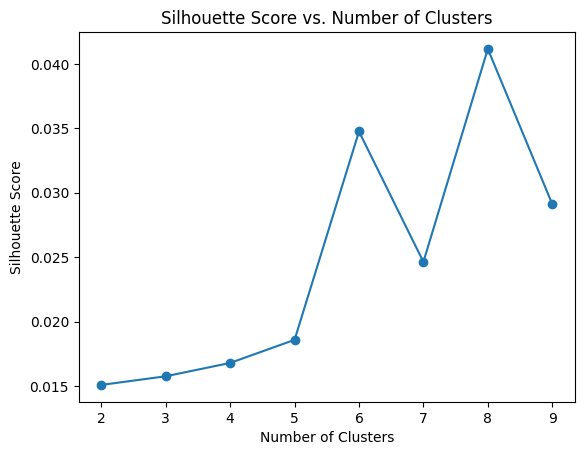

Optimal number of clusters: 8
Final Silhouette Score: 0.041166506805560915


In [515]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# Step 1: Optimize TF-IDF
vectorizer = TfidfVectorizer(
    max_features=100,  # Increase feature size to capture more details
    stop_words='english',
    max_df=0.85,       # Lower to exclude overly common words
)
tfidf_matrix = vectorizer.fit_transform(df1['cleaned_text'])

# Normalize the matrix for better clustering performance
tfidf_matrix_normalized = normalize(tfidf_matrix)

# Step 2: Optimize the Number of Clusters
silhouette_scores = []
cluster_range = range(2, 10)  # Test cluster sizes from 2 to 10
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix_normalized)
    score = silhouette_score(tfidf_matrix_normalized, cluster_labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Step 3: Select Optimal Cluster Size and Recompute Clustering
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_clusters}")

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df1['value'] = kmeans.fit_predict(tfidf_matrix_normalized)

# Step 4: Calculate and Display the Final Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix_normalized, df1['value'])
print(f"Final Silhouette Score: {silhouette_avg}")

**calculate silhouette score**

In [516]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, df1['value'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.04116650680556085


In [517]:
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words,lemmatized,stemmed,pos_tags,entities,topic,value
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ...","[(i, PRON), (', AUX), (m, AUX), (having, VERB)...",[],User Account queries,6
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot...","[(how, SCONJ), (do, AUX), (i, PRON), (change, ...",[],User Log In Sign Up queries,4
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ...","[(can, AUX), (i, PRON), (return, VERB), (a, DE...","[(last week, DATE)]",Orders and Product queries,2
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ...","[(when, SCONJ), (will, AUX), (my, PRON), (orde...",[],Orders and Product queries,0
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m...","[(i, PRON), (need, VERB), (to, PART), (update,...",[],Payment queries,5
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d...","[(is, AUX), (it, PRON), (possible, ADJ), (to, ...","[(a month ago, DATE)]",Orders and Product queries,2
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ...","[(my, PRON), (credit, NOUN), (card, NOUN), (wa...",[],Payment queries,1
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ....","[(i, PRON), (was, AUX), (charged, VERB), (twic...",[],Payment queries,1
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, discount, ...","[(do, AUX), (you, PRON), (have, VERB), (any, D...","[(the upcoming holiday season, DATE)]",Orders and Product queries,3
9,110,2024-11-10 11:15:00,Can you explain the warranty policy on your



---


# **Sentiment Analysis**

### **Type 1 - Sentiment Analysis by word count scoring using NLTK SentimentIntensityAnalyzer**

In [534]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

def analyze_message_sentiments(df):
    # Initialize VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Function to categorize sentiment scores
    def get_sentiment_category(score):
        if score >= 0.05:
            return 'Positive'
        elif score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    # Analyze sentiments
    sentiments = []
    sentiment_scores = []

    for message in df['message_text']:
        score = sia.polarity_scores(message)
        compound_score = score['compound']
        sentiment_scores.append(compound_score)
        sentiments.append(get_sentiment_category(compound_score))

    # Add results to dataframe
    df['sentiment_score'] = sentiment_scores
    df['sentiment'] = sentiments

    # Group messages by sentiment
    sentiment_groups = {
        'Positive': [],
        'Neutral': [],
        'Negative': []
    }

    for idx, row in df.iterrows():
        sentiment_groups[row['sentiment']].append({
            'message': row['message_text'],
            'score': row['sentiment_score']
        })

    # Print results
    print("Sentiment Analysis Results:")
    print("=" * 50)

    for sentiment, messages in sentiment_groups.items():
        print(f"\n{sentiment} Messages ({len(messages)}):")
        print("-" * 30)
        # Sort messages by absolute score and show top 3 examples
        sorted_messages = sorted(messages, key=lambda x: abs(x['score']), reverse=True)
        for msg in sorted_messages[:4]:
            print(f"- Score: {msg['score']:.3f}")
            print(f"  Message: {msg['message']}\n")

    return sentiment_groups

# Run sentiment analysis
sentiment_results = analyze_message_sentiments(df1)

Sentiment Analysis Results:

Positive Messages (4):
------------------------------
- Score: 0.402
  Message: Do you have any new deals or discounts for the upcoming holiday season?

- Score: 0.318
  Message: I'm having trouble logging into my account, please help me.

- Score: 0.202
  Message: My credit card was charged incorrectly. Can you assist with that?

- Score: 0.128
  Message: I was charged twice for the same order. Please check it.


Neutral Messages (4):
------------------------------
- Score: 0.000
  Message: How do I change my password? I forgot the old one.

- Score: 0.000
  Message: When will my order be shipped? I haven't received any updates.

- Score: 0.000
  Message: I need to update my shipping address for my recent order.

- Score: 0.000
  Message: Can you explain the warranty policy on your electronics products?


Negative Messages (2):
------------------------------
- Score: -0.440
  Message: Can I return a product that I bought last week? It's defective.

- Score

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### **Sentiment Destribution plot**

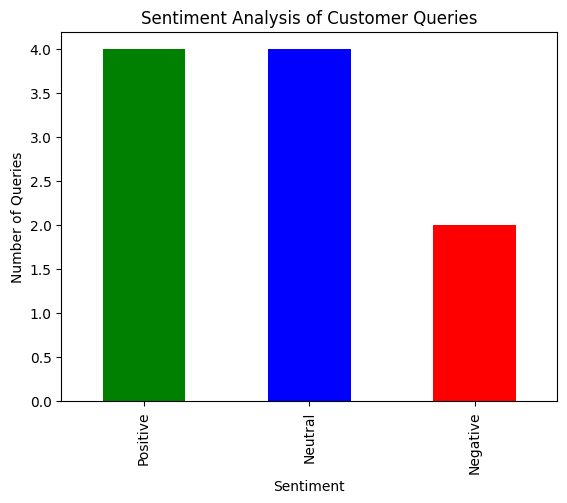

In [519]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
df1['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Sentiment Analysis of Customer Queries")
plt.xlabel("Sentiment")
plt.ylabel("Number of Queries")
plt.show()

In [520]:
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words,lemmatized,stemmed,pos_tags,entities,topic,value,sentiment_score,sentiment
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ...","[(i, PRON), (', AUX), (m, AUX), (having, VERB)...",[],User Account queries,6,0.3182,Positive
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot...","[(how, SCONJ), (do, AUX), (i, PRON), (change, ...",[],User Log In Sign Up queries,4,0.0000,Neutral
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ...","[(can, AUX), (i, PRON), (return, VERB), (a, DE...","[(last week, DATE)]",Orders and Product queries,2,-0.4404,Negative
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ...","[(when, SCONJ), (will, AUX), (my, PRON), (orde...",[],Orders and Product queries,0,0.0000,Neutral
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m...","[(i, PRON), (need, VERB), (to, PART), (update,...",[],Payment queries,5,0.0000,Neutral
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d...","[(is, AUX), (it, PRON), (possible, ADJ), (to, ...","[(a month ago, DATE)]",Orders and Product queries,2,-0.4404,Negative
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ...","[(my, PRON), (credit, NOUN), (card, NOUN), (wa...",[],Payment queries,1,0.2023,Positive
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ....","[(i, PRON), (was, AUX), (charged, VERB), (twic...",[],Payment queries,1,0.1280,Positive
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, discount, ...","[(do, AUX), (you, PRON), (have, VERB

### **sentiment score plot**

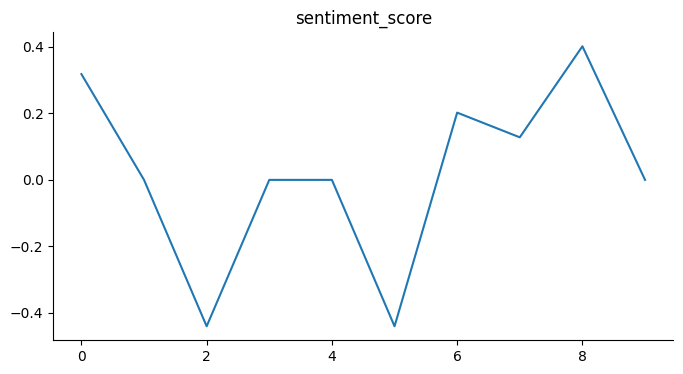

In [521]:
from matplotlib import pyplot as plt
df1['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [522]:
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words,lemmatized,stemmed,pos_tags,entities,topic,value,sentiment_score,sentiment
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ...","[(i, PRON), (', AUX), (m, AUX), (having, VERB)...",[],User Account queries,6,0.3182,Positive
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot...","[(how, SCONJ), (do, AUX), (i, PRON), (change, ...",[],User Log In Sign Up queries,4,0.0000,Neutral
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ...","[(can, AUX), (i, PRON), (return, VERB), (a, DE...","[(last week, DATE)]",Orders and Product queries,2,-0.4404,Negative
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ...","[(when, SCONJ), (will, AUX), (my, PRON), (orde...",[],Orders and Product queries,0,0.0000,Neutral
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m...","[(i, PRON), (need, VERB), (to, PART), (update,...",[],Payment queries,5,0.0000,Neutral
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d...","[(is, AUX), (it, PRON), (possible, ADJ), (to, ...","[(a month ago, DATE)]",Orders and Product queries,2,-0.4404,Negative
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ...","[(my, PRON), (credit, NOUN), (card, NOUN), (wa...",[],Payment queries,1,0.2023,Positive
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ....","[(i, PRON), (was, AUX), (charged, VERB), (twic...",[],Payment queries,1,0.1280,Positive
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, discount, ...","[(do, AUX), (you, PRON), (have, VERB

In [523]:
# Filter negative sentiment queries
negative_queries = df1[df1['sentiment'] == 'Negative']

# Group negative queries by topics (from clustering)
for i in range(num_clusters):
    cluster_queries = negative_queries[negative_queries['value'] == i]['cleaned_text']
    print(f"\nNegative Sentiment Queries for Topic {i}:")
    print(cluster_queries.head(5))  # Display sample queries


Negative Sentiment Queries for Topic 0:
Series([], Name: cleaned_text, dtype: object)

Negative Sentiment Queries for Topic 1:
Series([], Name: cleaned_text, dtype: object)

Negative Sentiment Queries for Topic 2:
2    can i return a product that i bought last week...
5    is it possible to get a refund on a defective ...
Name: cleaned_text, dtype: object

Negative Sentiment Queries for Topic 3:
Series([], Name: cleaned_text, dtype: object)

Negative Sentiment Queries for Topic 4:
Series([], Name: cleaned_text, dtype: object)



Sentiment Distribution by Topic:
sentiment                    Negative  Neutral  Positive
topic                                                   
Orders and Product queries        2.0      1.0       1.0
Payment queries                   0.0      1.0       2.0
User Account queries              0.0      0.0       1.0
User Log In Sign Up queries       0.0      1.0       0.0
Warrenty queries                  0.0      1.0       0.0


<Axes: title={'center': 'Sentiment Trends Across Topics'}, xlabel='topic'>

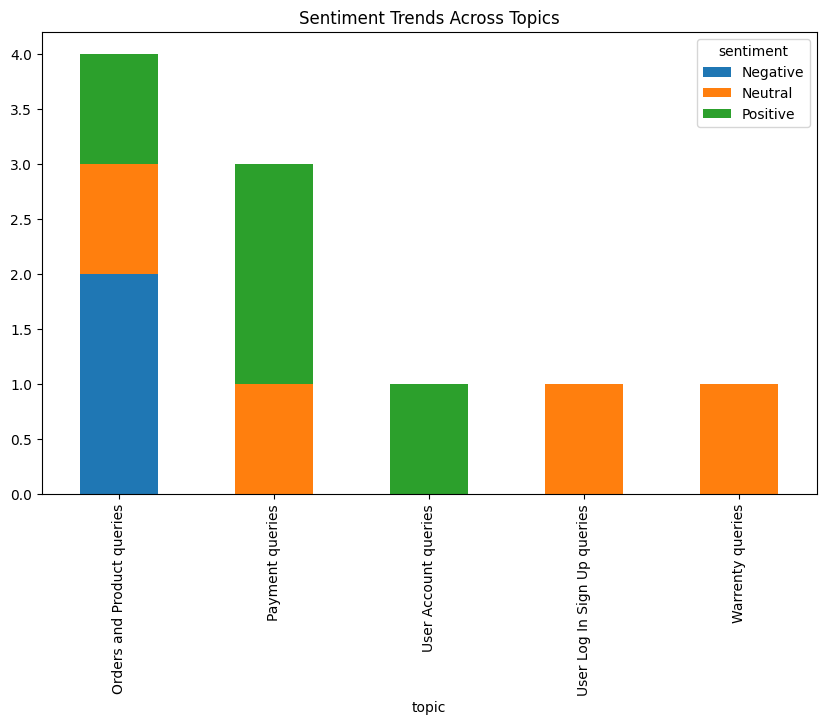

In [524]:
# Sentiment distribution by topic
sentiment_by_topic = df1.groupby(['topic', 'sentiment']).size().unstack().fillna(0)
print("\nSentiment Distribution by Topic:")
print(sentiment_by_topic)

# Plot sentiment distribution
sentiment_by_topic.plot(kind='bar', stacked=True, figsize=(10, 6), title='Sentiment Trends Across Topics')



---


### **Type 2 - Sentiment Analysis Using Textblob**

In [525]:
from textblob import TextBlob

# Create a dictionary of documents from the `tokenized_words` column in `df1`
documents = {idx: ' '.join(words) for idx, words in enumerate(df1['tokenized_words'])}

# Analyze sentiment for each document
sentiments = {}
for doc_id, text in documents.items():
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Sentiment score between -1 (negative) and 1 (positive)
    label = "POSITIVE" if polarity > 0 else "NEGATIVE" if polarity < 0 else "NEUTRAL"
    sentiments[doc_id] = {"label": label, "polarity": polarity}

# Print sentiment results
print("Sentiment Results:")
for doc_id, result in sentiments.items():
    print(f"Document {doc_id}: {result}")

# Example cluster assignments (assuming precomputed clusters for demonstration)
cluster_assignments = {doc_id: doc_id % 4 for doc_id in documents.keys()}  # Mock cluster assignments

# Aggregate sentiment by cluster
cluster_sentiments = {}
for doc_id, cluster_id in cluster_assignments.items():
    if cluster_id not in cluster_sentiments:
        cluster_sentiments[cluster_id] = {"POSITIVE": 0, "NEGATIVE": 0, "NEUTRAL": 0, "count": 0}

    label = sentiments[doc_id]['label']
    cluster_sentiments[cluster_id][label] += 1
    cluster_sentiments[cluster_id]["count"] += 1

# Print aggregated sentiment results by cluster
print("\nCluster Sentiments:")
for cluster_id, scores in cluster_sentiments.items():
    for sentiment, count in scores.items():
        if sentiment != "count":
            ratio = count / scores["count"]
            print(f"Cluster {cluster_id}: {sentiment}={ratio:.2f}")

Sentiment Results:
Document 0: {'label': 'NEGATIVE', 'polarity': -0.2}
Document 1: {'label': 'POSITIVE', 'polarity': 0.1}
Document 2: {'label': 'NEUTRAL', 'polarity': 0.0}
Document 3: {'label': 'NEUTRAL', 'polarity': 0.0}
Document 4: {'label': 'NEUTRAL', 'polarity': 0.0}
Document 5: {'label': 'NEUTRAL', 'polarity': 0.0}
Document 6: {'label': 'NEUTRAL', 'polarity': 0.0}
Document 7: {'label': 'NEUTRAL', 'polarity': 0.0}
Document 8: {'label': 'POSITIVE', 'polarity': 0.13636363636363635}
Document 9: {'label': 'NEUTRAL', 'polarity': 0.0}

Cluster Sentiments:
Cluster 0: POSITIVE=0.33
Cluster 0: NEGATIVE=0.33
Cluster 0: NEUTRAL=0.33
Cluster 1: POSITIVE=0.33
Cluster 1: NEGATIVE=0.00
Cluster 1: NEUTRAL=0.67
Cluster 2: POSITIVE=0.00
Cluster 2: NEGATIVE=0.00
Cluster 2: NEUTRAL=1.00
Cluster 3: POSITIVE=0.00
Cluster 3: NEGATIVE=0.00
Cluster 3: NEUTRAL=1.00


In [526]:
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words,lemmatized,stemmed,pos_tags,entities,topic,value,sentiment_score,sentiment
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ...","[(i, PRON), (', AUX), (m, AUX), (having, VERB)...",[],User Account queries,6,0.3182,Positive
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot...","[(how, SCONJ), (do, AUX), (i, PRON), (change, ...",[],User Log In Sign Up queries,4,0.0000,Neutral
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ...","[(can, AUX), (i, PRON), (return, VERB), (a, DE...","[(last week, DATE)]",Orders and Product queries,2,-0.4404,Negative
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ...","[(when, SCONJ), (will, AUX), (my, PRON), (orde...",[],Orders and Product queries,0,0.0000,Neutral
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m...","[(i, PRON), (need, VERB), (to, PART), (update,...",[],Payment queries,5,0.0000,Neutral
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d...","[(is, AUX), (it, PRON), (possible, ADJ), (to, ...","[(a month ago, DATE)]",Orders and Product queries,2,-0.4404,Negative
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ...","[(my, PRON), (credit, NOUN), (card, NOUN), (wa...",[],Payment queries,1,0.2023,Positive
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ....","[(i, PRON), (was, AUX), (charged, VERB), (twic...",[],Payment queries,1,0.1280,Positive
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, discount, ...","[(do, AUX), (you, PRON), (have, VERB



---


### **Trends about Queries**

<Axes: title={'center': 'Hourly Trends of Customer Queries'}, xlabel='hour'>

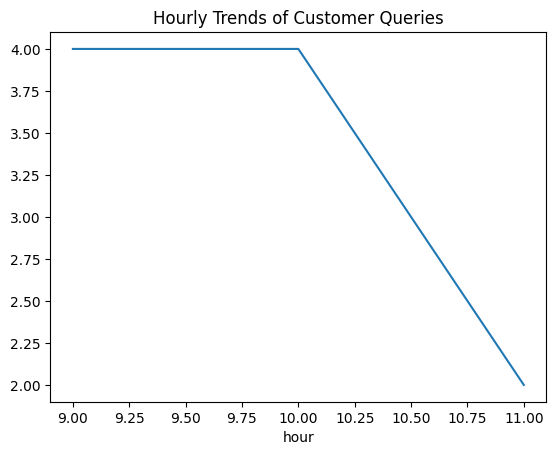

In [527]:
# Extract timestamps and analyze trends
df1['chat_date'] = pd.to_datetime(df1['chat_date'])  # Ensure timestamps are in datetime format
df1['hour'] = df1['chat_date'].dt.hour

# Analyze frequency of concerns by hour
hourly_trends = df1.groupby('hour').size()
hourly_trends.plot(kind='line', title='Hourly Trends of Customer Queries')

In [528]:
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words,lemmatized,stemmed,pos_tags,entities,topic,value,sentiment_score,sentiment,hour
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ...","[(i, PRON), (', AUX), (m, AUX), (having, VERB)...",[],User Account queries,6,0.3182,Positive,9
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot...","[(how, SCONJ), (do, AUX), (i, PRON), (change, ...",[],User Log In Sign Up queries,4,0.0000,Neutral,9
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ...","[(can, AUX), (i, PRON), (return, VERB), (a, DE...","[(last week, DATE)]",Orders and Product queries,2,-0.4404,Negative,9
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ...","[(when, SCONJ), (will, AUX), (my, PRON), (orde...",[],Orders and Product queries,0,0.0000,Neutral,9
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m...","[(i, PRON), (need, VERB), (to, PART), (update,...",[],Payment queries,5,0.0000,Neutral,10
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d...","[(is, AUX), (it, PRON), (possible, ADJ), (to, ...","[(a month ago, DATE)]",Orders and Product queries,2,-0.4404,Negative,10
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ...","[(my, PRON), (credit, NOUN), (card, NOUN), (wa...",[],Payment queries,1,0.2023,Positive,10
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ....","[(i, PRON), (was, AUX), (charged, VERB), (twic...",[],Payment queries,1,0.1280,Positive,10
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, discount, ...","[(do, AUX),



---
### **PCA**


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



Cluster 0 Top Terms:
order

Cluster 1 Top Terms:
order

Cluster 2 Top Terms:
order

Cluster 3 Top Terms:
order

Cluster 4 Top Terms:
order

Sample Queries for Topic 0:
Series([], Name: cleaned_text, dtype: object)

Sample Queries for Topic 1:
Series([], Name: cleaned_text, dtype: object)

Sample Queries for Topic 2:
Series([], Name: cleaned_text, dtype: object)

Sample Queries for Topic 3:
Series([], Name: cleaned_text, dtype: object)

Sample Queries for Topic 4:
Series([], Name: cleaned_text, dtype: object)


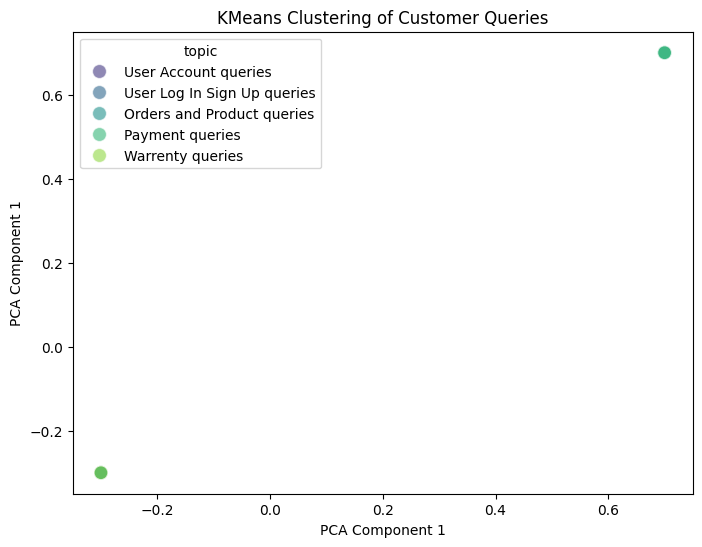

In [529]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Tfidf Vectorization (Improved with parameters)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=3, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df1['cleaned_text'])

# Step 2: Dimensionality Reduction with PCA (Optional, for better clustering)
n_components = min(50, tfidf_matrix.shape[1]) # Choose the minimum between 50 and the number of features
pca = PCA(n_components=n_components)  # Reduce to a suitable number of components
reduced_matrix = pca.fit_transform(tfidf_matrix.toarray())

# Step 3: KMeans Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reduced_matrix)

# Step 4: Add cluster labels to the dataframe
df1['PCA_Labels'] = kmeans.labels_

# Step 5: Display the top terms per cluster
def print_top_terms_per_cluster(vectorizer, kmeans, n_top_terms=10):
    terms = vectorizer.get_feature_names_out()
    for i in range(kmeans.n_clusters):
        print(f"\nCluster {i} Top Terms:")
        cluster_center = kmeans.cluster_centers_[i]
        top_terms_idx = cluster_center.argsort()[-n_top_terms:][::-1]
        top_terms = [terms[idx] for idx in top_terms_idx]
        print(", ".join(top_terms))

print_top_terms_per_cluster(vectorizer, kmeans)

# Step 6: Display sample queries for each topic (top 5 samples)
for i in range(num_clusters):
    print(f"\nSample Queries for Topic {i}:")
    print(df1[df1['topic'] == i]['cleaned_text'].head())

# Step 7: Visualize the clustering result (optional)
# Plot the top two principal components for visual understanding
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_matrix[:, 0], y=reduced_matrix[:, 0], hue=df1['topic'], palette='viridis', s=100, alpha=0.6)
plt.title('KMeans Clustering of Customer Queries')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 1')
plt.show()

In [530]:
df1

,customer_id,chat_date,message_text,cleaned_text,tokenized_sentences,tokenized_words,lemmatized,stemmed,pos_tags,entities,topic,value,sentiment_score,sentiment,hour,PCA_Labels
0,101,2024-01-10 09:00:00,"I'm having trouble logging into my account, pl...","i'm having trouble logging into my account, pl...","[i'm having trouble logging into my account, p...","[i, 'm, having, trouble, logging, into, my, ac...","[I, ', have, trouble, log, into, my, account, ...","[i, 'm, have, troubl, log, into, my, account, ...","[(i, PRON), (', AUX), (m, AUX), (having, VERB)...",[],User Account queries,6,0.3182,Positive,9,1
1,102,2024-02-04 09:15:00,How do I change my password? I forgot the old ...,how do i change my password? i forgot the old ...,"[how do i change my password?, i forgot the ol...","[how, do, i, change, my, password, ?, i, forgo...","[how, do, I, change, my, password, ?, I, forge...","[how, do, i, chang, my, password, ?, i, forgot...","[(how, SCONJ), (do, AUX), (i, PRON), (change, ...",[],User Log In Sign Up queries,4,0.0000,Neutral,9,1
2,103,2024-04-10 09:30:00,Can I return a product that I bought last week...,can i return a product that i bought last week...,[can i return a product that i bought last wee...,"[can, i, return, a, product, that, i, bought, ...","[can, I, return, a, product, that, I, buy, las...","[can, i, return, a, product, that, i, bought, ...","[(can, AUX), (i, PRON), (return, VERB), (a, DE...","[(last week, DATE)]",Orders and Product queries,2,-0.4404,Negative,9,1
3,104,2024-05-20 09:45:00,When will my order be shipped? I haven't recei...,when will my order be shipped? i haven't recei...,"[when will my order be shipped?, i haven't rec...","[when, will, my, order, be, shipped, ?, i, hav...","[when, will, my, order, be, ship, ?, I, have, ...","[when, will, my, order, be, ship, ?, i, have, ...","[(when, SCONJ), (will, AUX), (my, PRON), (orde...",[],Orders and Product queries,0,0.0000,Neutral,9,0
4,105,2024-06-08 10:00:00,I need to update my shipping address for my re...,i need to update my shipping address for my re...,[i need to update my shipping address for my r...,"[i, need, to, update, my, shipping, address, f...","[I, need, to, update, my, ship, address, for, ...","[i, need, to, updat, my, ship, address, for, m...","[(i, PRON), (need, VERB), (to, PART), (update,...",[],Payment queries,5,0.0000,Neutral,10,0
5,106,2024-06-20 10:15:00,Is it possible to get a refund on a defective ...,is it possible to get a refund on a defective ...,[is it possible to get a refund on a defective...,"[is, it, possible, to, get, a, refund, on, a, ...","[be, it, possible, to, get, a, refund, on, a, ...","[is, it, possibl, to, get, a, refund, on, a, d...","[(is, AUX), (it, PRON), (possible, ADJ), (to, ...","[(a month ago, DATE)]",Orders and Product queries,2,-0.4404,Negative,10,1
6,107,2024-07-15 10:30:00,My credit card was charged incorrectly. Can yo...,my credit card was charged incorrectly. can yo...,"[my credit card was charged incorrectly., can ...","[my, credit, card, was, charged, incorrectly, ...","[my, credit, card, be, charge, incorrectly, .,...","[my, credit, card, wa, charg, incorrectli, ., ...","[(my, PRON), (credit, NOUN), (card, NOUN), (wa...",[],Payment queries,1,0.2023,Positive,10,1
7,108,2024-08-18 10:45:00,I was charged twice for the same order. Please...,i was charged twice for the same order. please...,"[i was charged twice for the same order., plea...","[i, was, charged, twice, for, the, same, order...","[I, be, charge, twice, for, the, same, order, ...","[i, wa, charg, twice, for, the, same, order, ....","[(i, PRON), (was, AUX), (charged, VERB), (twic...",[],Payment queries,1,0.1280,Positive,10,0
8,109,2024-10-05 11:00:00,Do you have any new deals or discounts for the...,do you have any new deals or discounts for the...,[do you have any new deals or discounts for th...,"[do, you, have, any, new, deals, or, discounts...","[do, you, have, any, new, deal, or, discount, ...","[do, you, have, ani, new, deal, or, 